In [20]:
import numpy as np
import matplotlib.pyplot as plt
from main import nmf_son
np.random.seed(42)
np.set_printoptions(precision=3)

In [21]:
def normalized_similarity(W_ins):
    r = W_ins.shape[1]
    res = np.ones(shape=(r, r)) * -1
    for i in range(r):
        for j in range(r):
            res[i, j] = np.linalg.norm(W_ins[:, i] - W_ins[:, j])
        res[i, :] = res[i, :] / sum(res[i, :])
    return res

In [22]:
m, n, r_true = 9, 6, 3
W_true = np.zeros((m, r_true))
W_true[0:3, 0] = 1
W_true[3:6, 1] = 1
W_true[6:m, 2] = 1
H_true = 10 * np.random.rand(r_true, n)
M = W_true @ H_true

In [23]:
W_true

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [24]:
H_true

array([[3.745, 9.507, 7.32 , 5.987],
       [1.56 , 1.56 , 0.581, 8.662]])

In [25]:
rank = 5
W_ini = np.random.rand(m, rank)
H_ini = np.random.rand(rank, n)

In [26]:
# from sklearn.decomposition import NMF
# model = NMF(n_components=rank, init='random', random_state=0)
# vanillaW = model.fit_transform(M)
# vanillaH = model.components_

In [27]:
itermax = 400
Wb, Hb, Wl, Hl, fscores, gscores, lambda_vals = nmf_son(M, W_ini.copy(), H_ini.copy(), _lambda=0.2,itermax=itermax, scale_lambda=True, verbose=True)

Iteration: 1, f=7.917043784456973, g=4.351746775015195,  total=16.657776736471227
Iteration: 2, f=4.092438102027072, g=4.013134900108065,  total=5.55264092906206
Iteration: 3, f=1.9610835989010098, g=4.025649963983892,  total=2.7821236938944756
Iteration: 4, f=1.1880304027973816, g=4.030998295801851,  total=1.5807682074162315
Iteration: 5, f=0.9484856063106811, g=4.008080822484553,  total=1.1847408227388279
Iteration: 6, f=0.7960791985138319, g=3.9741952505503164,  total=0.9841725608367307
Iteration: 7, f=0.6804750870433584, g=3.9341598103947124,  total=0.8380870105265174
Iteration: 8, f=0.5912822984259554, g=3.8900737987658145,  total=0.7258522414072331
Iteration: 9, f=0.5216173993730202, g=3.8434695875058766,  total=0.6384571124063175
Iteration: 10, f=0.46656824668251734, g=3.7954315194095063,  total=0.5695878269642749
Iteration: 11, f=0.42253784610019074, g=3.746715446654522,  total=0.5146537727253601
Iteration: 12, f=0.3870014233106834, g=3.6978126560500364,  total=0.47040598483747

In [28]:
W_ins = Wl
(W_ins >= 0).all()

True

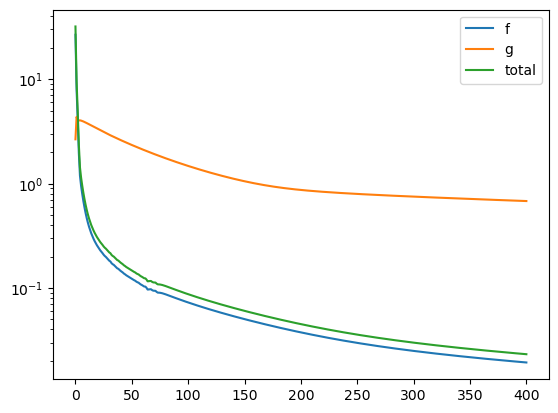

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yscale('log')
ax.plot(fscores)
ax.plot(gscores)
ax.plot(fscores + lambda_vals * gscores)
ax.legend(['f', 'g', 'total'])

In [30]:
normalized_similarity(W_ins)

array([[0.   , 0.46 , 0.54 ],
       [0.334, 0.   , 0.666],
       [0.37 , 0.63 , 0.   ]])

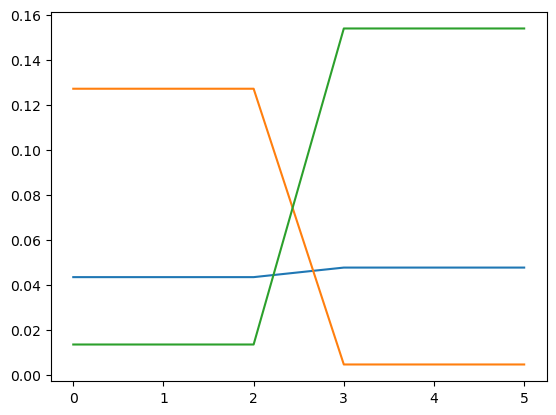

In [31]:
plt.plot(W_ins)

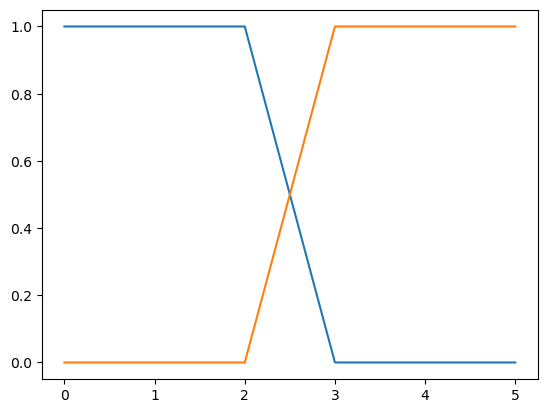

In [32]:
plt.plot(W_true)